In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
matmul_4090_run = pd.read_csv(
    f"../results/matmul_RTX4090_gpu_with_freq.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "energy", "frequency", ""]
)
matmul_4090_run["throughput"] = (
    matmul_4090_run["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_4090_run.set_index(["M", "N", "K"], inplace=True)

matmul_6000ada_run = pd.read_csv(
    f"../results/matmul_RTX6000Ada_gpu_tmp2.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "energy", "frequency", ""]
)
matmul_6000ada_run["throughput"] = (
    matmul_6000ada_run["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_6000ada_run.set_index(["M", "N", "K"], inplace=True)

matmul_l4_run = pd.read_csv(
    f"../results/matmul_L4_gpu_tmp1.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "energy", "frequency", ""]
)
matmul_l4_run["throughput"] = (
    matmul_l4_run["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_l4_run.set_index(["M", "N", "K"], inplace=True)

color_NV = sns.color_palette("Greens_d", 4)[1:]

FileNotFoundError: [Errno 2] No such file or directory: 'matmul_RTX4090_gpu_with_freq.csv'

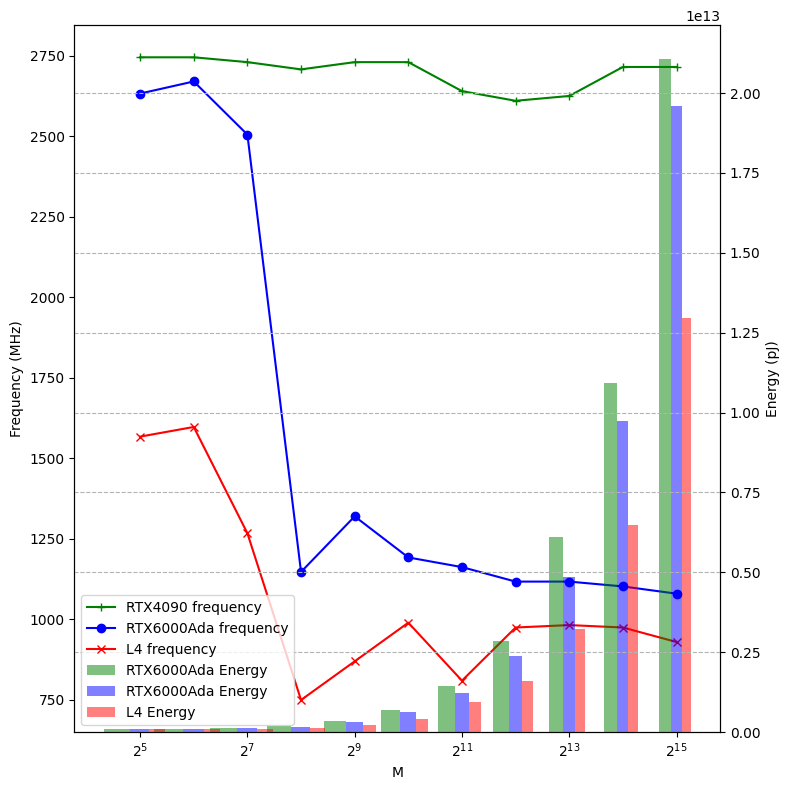

<Figure size 640x480 with 0 Axes>

In [ ]:
K = 12288
N = K
title = f"Performance of Matmul with K={K}, N={N}"
M_list = []


frequency_4090_run_list = []
energy_4090_run_list = []
frequency_6000ada_run_list = []
energy_6000ada_run_list = []
frequency_l4_run_list = []
energy_l4_run_list = []
for M in range(5, 16):
    M = 2**M
    M_list.append(M)
    frequency_4090_run_list.append(matmul_4090_run.loc[(M, N, K), "frequency"])
    energy_4090_run_list.append(matmul_4090_run.loc[(M, N, K), "energy"])
    frequency_6000ada_run_list.append(matmul_6000ada_run.loc[(M, N, K), "frequency"])
    energy_6000ada_run_list.append(matmul_6000ada_run.loc[(M, N, K), "energy"])
    frequency_l4_run_list.append(matmul_l4_run.loc[(M, N, K), "frequency"])
    energy_l4_run_list.append(matmul_l4_run.loc[(M, N, K), "energy"])

fig, ax1 = plt.subplots(figsize=(8, 8))

ax1.set_xscale("log", base=2)
ax1.set_xlabel("M")
ax1.plot(M_list, frequency_4090_run_list, marker="+", label=f"RTX4090 frequency", color='green')
ax1.plot(M_list, frequency_6000ada_run_list, marker="o", label=f"RTX6000Ada frequency", color='blue')
ax1.plot(M_list, frequency_l4_run_list, marker="x", label=f"L4 frequency", color='red')
ax1.set_ylabel('Frequency (MHz)')

ax2 = ax1.twinx()
#ax2.set_yscale("log")
M_list = np.array(M_list)
bar_widths = ((M_list - 2**4) * 2) / np.log2(M_list - 2**4)
ax2.set_ylabel('Energy (pJ)')

ax2.bar(M_list - (bar_widths), energy_4090_run_list, width = bar_widths, label='RTX6000Ada Energy', color='green', alpha=0.5)
ax2.bar(M_list, energy_6000ada_run_list, width = bar_widths, label='RTX6000Ada Energy', color='blue', alpha=0.5)
ax2.bar(M_list + (bar_widths), energy_l4_run_list, width = bar_widths, label='L4 Energy', color='red', alpha=0.5)

ax2.plot([], [], marker="+", label=f"RTX4090 frequency", color='green')
ax2.plot([], [], marker="o", label=f"RTX6000Ada frequency", color='blue')
ax2.plot([], [], marker="x", label=f"L4 frequency", color='red')

ax2.legend(loc='lower left')

plt.grid(True, which="both", ls="--", c="0.7")  # Adding a grid for better readability
plt.tight_layout()
plt.show()

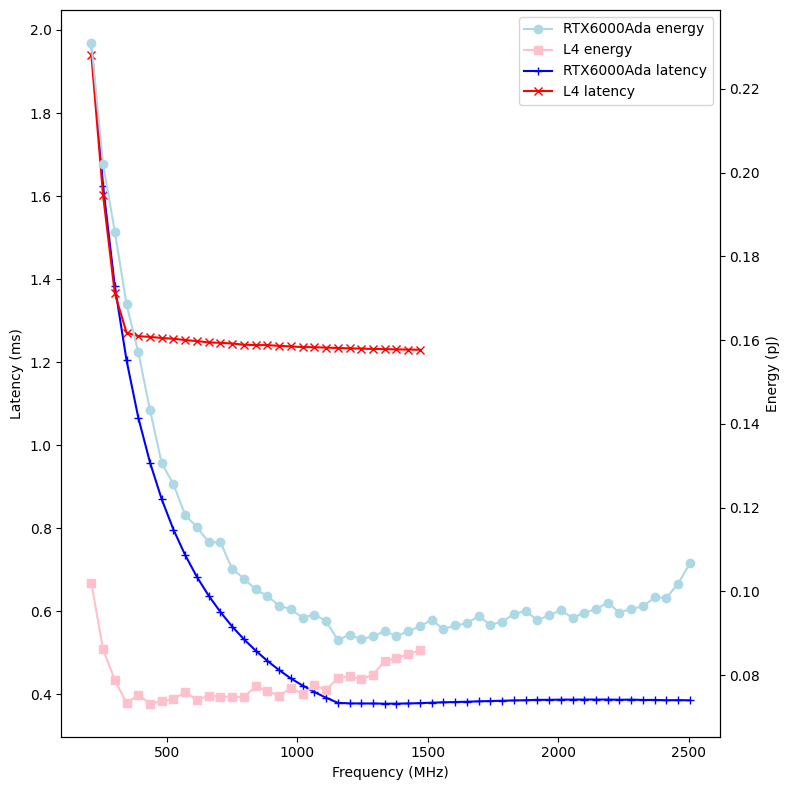

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

frequency_6000_run = pd.read_csv(
    f"frequency_RTX6000Ada_gpu_mem5001.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "energy", "frequency", ""]
)
frequency_6000_run["throughput"] = (
    frequency_6000_run["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
frequency_6000_run["latency"] = (
    frequency_6000_run["latency"].str.extract(r"(\d+\.?\d*)").astype(float)
)
frequency_6000_run["power"] = (
    frequency_6000_run["power"].str.extract(r"(\d+\.?\d*)").astype(float)
)
frequency_6000_run.set_index(["frequency"], inplace=True)

frequency_L4_run = pd.read_csv(
    f"frequency_L4_gpu_mem6251.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "energy", "frequency", ""]
)
frequency_L4_run["throughput"] = (
    frequency_L4_run["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
frequency_L4_run["latency"] = (
    frequency_L4_run["latency"].str.extract(r"(\d+\.?\d*)").astype(float)
)
frequency_L4_run["power"] = (
    frequency_L4_run["power"].str.extract(r"(\d+\.?\d*)").astype(float)
)
frequency_L4_run.set_index(["frequency"], inplace=True)


start_freq = 210
end_freq = 2505
step = 45

F_6000_list = []
latency_6000_list = []
energy_6000_list = []
power_6000_list = []
F_L4_list = []
latency_L4_list = []
energy_L4_list = []
power_L4_list = []
for F in range(start_freq, end_freq + 1, step):
    if F in frequency_6000_run.index:
        F_6000_list.append(F)
        latency_6000_list.append(frequency_6000_run.loc[(F), "latency"])
        energy_6000_list.append(frequency_6000_run.loc[(F), "energy"] * 1e-12)
        power_6000_list.append(frequency_6000_run.loc[(F), "power"])
    if F in frequency_L4_run.index:
        F_L4_list.append(F)
        latency_L4_list.append(frequency_L4_run.loc[(F), "latency"])
        energy_L4_list.append(frequency_L4_run.loc[(F), "energy"] * 1e-12)
        power_L4_list.append(frequency_L4_run.loc[(F), "power"])

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel("Frequency (MHz)")

ax1.plot(F_6000_list, latency_6000_list, marker="+", label=f"RTX6000Ada latency", color='blue')
ax1.plot(F_L4_list[:29], latency_L4_list, marker="x", label=f"L4 latency", color='red')
ax1.set_ylabel('Latency (ms)')

ax2 = ax1.twinx()
ax2.plot(F_6000_list, energy_6000_list, marker="o", label=f"RTX6000Ada energy", color='lightblue')
ax2.plot(F_L4_list[:29], energy_L4_list, marker="s", label=f"L4 energy", color='pink')
ax2.set_ylabel('Energy (pJ)')

ax2.plot([], [], marker="+", label=f"RTX6000Ada latency", color='blue')
ax2.plot([], [], marker="x", label=f"L4 latency", color='red')

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

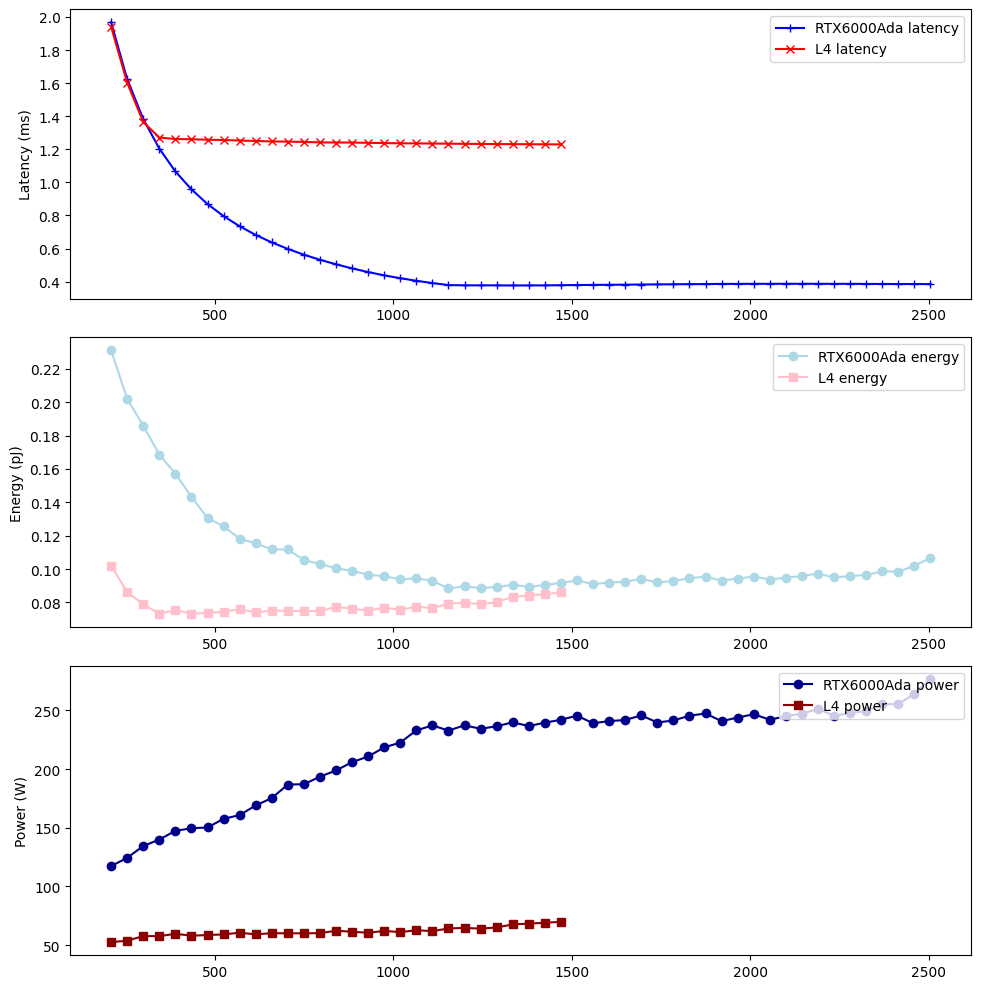

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(F_6000_list, latency_6000_list, marker="+", label=f"RTX6000Ada latency", color='blue')
axs[0].plot(F_L4_list, latency_L4_list, marker="x", label=f"L4 latency", color='red')
axs[0].set_ylabel('Latency (ms)')
axs[0].legend(loc='upper right')

axs[1].plot(F_6000_list, energy_6000_list, marker="o", label=f"RTX6000Ada energy", color='lightblue')
axs[1].plot(F_L4_list, energy_L4_list, marker="s", label=f"L4 energy", color='pink')
axs[1].set_ylabel('Energy (pJ)')
axs[1].legend(loc='upper right')

axs[2].plot(F_6000_list, power_6000_list, marker="o", label=f"RTX6000Ada power", color='darkblue')
axs[2].plot(F_L4_list, power_L4_list, marker="s", label=f"L4 power", color='darkred')
axs[2].set_ylabel('Power (W)')
axs[2].legend(loc='upper right')

plt.tight_layout()
plt.show()